In [249]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

#import modul for calssification model
from sklearn.model_selection import train_test_split #untuk membagi data menjadi 2 training dan testing
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report #untuk mengevaluasi performa data

In [250]:
#Load dataset
df_iris = pd.read_csv('./dataset/iris/Iris.csv')

In [251]:
df_iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [252]:
df_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [253]:
#delete id columns
df_iris.drop(columns='Id', inplace=True)

In [254]:
df_iris.head() #columns Id will drop

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [255]:
#identify the shape dataset
df_iris.shape

(150, 5)

In [256]:
df_iris.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [257]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [258]:
#identify missing data
df_iris.isna().values.any()

False

In [259]:
#identify duplicate data
df_iris[df_iris.duplicated()]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [260]:
df_iris.duplicated().value_counts()

False    147
True       3
dtype: int64

In [261]:
#drop duplicated data
df_iris.drop_duplicates(inplace=True)
df_iris.duplicated().value_counts()

False    147
dtype: int64

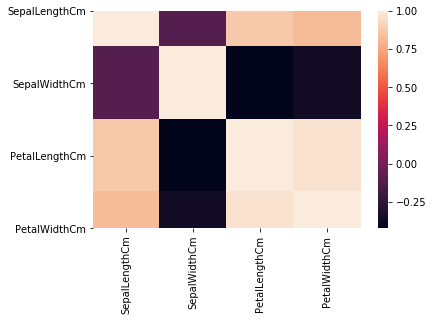

In [262]:
#Heatmap
sn.heatmap(data = df_iris.corr())

In [263]:
df_iris['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: Species, dtype: int64

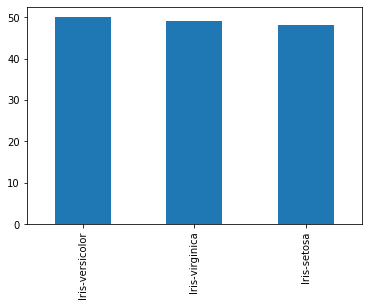

In [264]:
df_iris['Species'].value_counts().plot.bar()

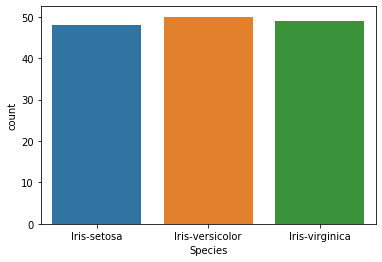

In [265]:
#visualization by seaborn
sn.countplot(data = df_iris, x='Species')

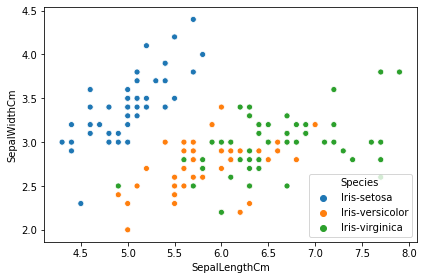

In [266]:
sn.scatterplot(df_iris['SepalLengthCm'], df_iris['SepalWidthCm'], hue=df_iris['Species'])
plt.tight_layout()

In [267]:
x = df_iris.drop(columns='Species')

In [268]:
y = df_iris['Species']

In [269]:
#split the dataset into trainning set and testing set 605 and 40%
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.4, random_state=10)

In [270]:
#identify shape after split dataset
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(88, 4) (59, 4) (88,) (59,)


In [278]:
#KNN Algorithm
from sklearn.neighbors import KNeighborsClassifier

In [281]:
k_range = list(range(1,26))
scores = []
for k in  k_range:
    model_knn = KNeighborsClassifier(n_neighbors =k) #konfigurasi algoritma
    model_knn.fit(X_train, y_train) #Fit the model using X as training data and y as target values
    y_pred = model_knn.predict(X_test) #Predict the class labels for the provided data.
    scores.append(accuracy_score(y_test, y_pred))

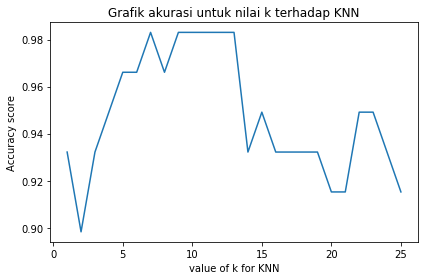

In [283]:
plt.plot(k_range, scores)
plt.xlabel("value of k for KNN")
plt.ylabel("Accuracy score")
plt.title('Grafik akurasi untuk nilai k terhadap KNN')
plt.tight_layout()
plt.show()

In [286]:
model_knn = KNeighborsClassifier(n_neighbors =3)
model_knn.fit(X_train, y_train)
y_pred = model_knn.predict(X_test)

In [290]:
print(accuracy_score(y_test, y_pred)*100,'%') #menghitung nilai akurasi

93.22033898305084 %
